# COGS 108 - Mental Health in Young Adults

Video Presentation Link: https://youtu.be/vcGZDnyVcwM

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Our research examined whether completing a higher level of education correlated to a higher score on the Depression, Anxiety, and Stress Scale (DASS) when compared to those who did not. We controlled for family size, ethnicity, and religion. Using OLS regression, we determined that level of education is not a predictor of one's DASS score.

# Names

- Daniel Au
- Jacob Au
- Mira Chokshi
- Sahil Dadhwal
- Ryan Xu

# PIDs

- A15614283
- A16341584
- A15520757
- A17222307
- A16641404

<a id='research_question'></a>
# Research Question

Is there a statistically significant difference in the distribution of the Depression Anxiety Stress Scales(DASS) in people aged 18-24 enrolled in academia versus those who are not, when controlling for religion, ethnicity, and number of siblings?

<a id='background'></a>

## Background & Prior Work

The amount of mental health issues in young people such as depression, anxiety, and stress are currently at the highest they have ever been. Mental health issues are affecting young people’s performance in their academic, professional, or social lives. As a result of stress, depression, or anxiety, young people are struggling to stay motivated to both work and  This begs the question as to what are the potential underlying cause(s) of the current mental health crises.

Between 2005-2017, the US has seen a 63% increase of major depressive episodes in people between the age of 18-25 (Twenge, 2017). Compared to other age cohorts in this study, including the adolescent group (12-17) and adults 26 and up, the 18-24 age group had the highest increase in major depressive episodes. This data sparks interest, as the 18-24 age period can be a tumulteous time, with college, career, and other factors beginning to take forefront. There have been multiple studies confirming the deteriorating mental health of the college student demographic. Researcher Sarah Ketchman found that from nearly 33,000 students at Boston University, around 50% screened positive for depression and/or anxiety (Ketchman, 2020). The overall enrollement rate of high school graduates to a 2- or 4-year college is 41%. This means a large population of young adults may be affected by their academic career and the pressures it comes with.

Unfortunately, these studies fail to compare how mental health trends differ between college-enrolled vs non-college-enrolled 18–24-year-olds. This begs the question - is your level of education a predominant factor contributing to depression and anxiety, or do other factors potentially play a more important role? Our goal, specifically, is to study the difference in the number of depression and anxiety cases when comparing these two demographics, while controlling for external factors such as religion, family size, and ethinicity.


References:
1)  https://www.bu.edu/articles/2021/depression-anxiety-loneliness-are-peaking-in-college-students/ 

2) https://psycnet.apa.org/fulltext/2019-12578-001.pdf?auth_token=2a835f2a1494571c8e041747907b403f6153d77b&returnUrl=https%3A%2F%2Fpsycnet.apa.org%2FdoiLanding%3Fdoi%3D10.1037%252Fabn0000410

3) https://www.apa.org/pubs/journals/releases/abn-abn0000410.pdf

4) https://nces.ed.gov/fastfacts/display.asp?id=51

# Hypothesis


We hypothesize that there might be an inverse correlation between enrollment in a university and worse mental health, despite influences of external factors such as family size, ethnicity, and religion. Our reasoning is that the pressure of academic performance, crippling student loads, and the stress of transitioning from high school to college / college to workforce potentially leads to higher DASS scores.

# Dataset(s)

- Dataset Name: 
    - Predicting Depression, Anxiety and Stress
- Link to the dataset: 
    - https://www.kaggle.com/yamqwe/depression-anxiety-stress-scales
- Number of observations: 
    - 39629
- Description:
    - This dataset contains the results of an open survey from 2017-2019 that measured the Depression Anxiety Stress Scale (DASS) scores of the participants. The dataset includes 42 statement questions, participants scores, self-indentifying variables such as religion, age, gender, etc. The rows of the dataset correspond to each participant. 
- Notable columns:
    - Columns Q1-42A are true/false statements that the participant answers on a scale of 1-4, where:
1 = Did not apply to me at all
2 = Applied to me to some degree, or some of the time
3 = Applied to me to a considerable degree, or a good part of the time
4 = Applied to me very much, or most of the time
These columns added up give the DASS score
    - Family Size
    - Ethnicity
    - Religion

# Setup

In [1]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn 
import seaborn as sns

# import patsy & statmodels
import patsy
import statsmodels.api as sm

# import scipy
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# improve resolution
%config InlineBackend.figure_format ='retina'

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
# Read in data and skip bad lines
df = pd.read_csv('data.csv',on_bad_lines='skip')


In [3]:
# Initialize empty lists that will be filled with data that will be used to drop specific unnecessary columns in our data
lsA = []
lsI = []
lsE = []
lsTIPI = []
lsVCL = []
depression_list = [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]
anxiety_list = [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41]
stress_list = [ 1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]

Here, we are beginning to clean our data, first by creating lists that we will use to modify our dataframe in the future.

In [4]:
# for loop is used to fill lists with titles of the unnecessary columns 
for i in range(1,43):
    lsA.append('Q' + str(i) + 'A')
    lsI.append('Q' + str(i) + 'I')
    lsE.append('Q' + str(i) + 'E')

for i in range(len(depression_list)):
    depression_list[i] = 'Q' + str(depression_list[i]) + 'A'
    anxiety_list[i] = 'Q' + str(anxiety_list[i]) + 'A'
    stress_list[i] = 'Q' + str(stress_list[i]) + 'A'

for i in range(1,11):
    lsTIPI.append('TIPI' + str(i))
                  
for i in range(1,17):
    lsVCL.append('VCL' + str(i))


Here we are modifying the above lists by adding some of our dataframe's lists that we want to remove, as they are not important for our analysis.

In [5]:
df['totalQA'] = df[lsA].sum(axis=1)
df['depression_total'] = df[depression_list].sum(axis=1)
df['stress_total'] = df[stress_list].sum(axis=1)
df['anxiety_total'] = df[anxiety_list].sum(axis=1)

Summing the linked questions of depression, anxiety, and stress, as well as the total of all of these to their own columns for easier analysis.

In [6]:
df = df.drop(lsI, axis = 1)
df = df.drop(lsE, axis = 1)
df = df.drop(lsTIPI, axis = 1)
df = df.drop(lsVCL, axis = 1)
df = df.drop(['source','urban','gender','voted','married','uniquenetworklocation','engnat','screensize',
             'hand','major','orientation','introelapse','testelapse','surveyelapse'], axis = 1)
df = df.drop(lsA, axis = 1)

df = df[df['education'] != 0]
df = df[df['religion'] != 0]
df = df[df['race'] != 0]
df = df[df['familysize'] != 0]

#Filtering for desired age and country
df = df.loc[(df['age'] >= 18) & (df['age'] <= 24)]
df = df.loc[(df['country'] == 'US')]
df = df.reset_index(drop=True)

Here we are dropping the columns that are not relevant to our research questions, as well as filtering the data to only pertain to participant's in the US as well as in our selected age range.

In [7]:
def standardize_education(status):
    if(status <= 2):
        return 'not completed college'
    else:
        return 'completed college'
df['education'] = df['education'].apply(standardize_education)


In [8]:
religions = 'Agnostic, Atheist, Buddhist, Christian (Catholic), Christian (Mormon), Christian (Protestant), Christian (Other), Hindu, Jewish, Muslim, Sikh, Other'.split(', ')
religions_num = range(1, 13)
rel_dict = dict(zip(religions_num, religions))

def standardize_religion(rel):
    return rel_dict[rel]
                
df['religion'] = df['religion'].apply(standardize_religion)

In [9]:
ethni = 'Asian, Arab, Black, Indigenous Australian, Native American, White, Other'.split(', ')
ethni_num = [10, 20, 30, 40, 50, 60, 70]
ethni_dict = dict(zip(ethni_num, ethni))

def standardize_ethnicity(eth):
    return ethni_dict[eth]
df['race'] = df['race'].apply(standardize_ethnicity)

Here we are changing our education from numeric to string values.

In [10]:
df

,country,education,age,religion,race,familysize,totalQA,depression_total,stress_total,anxiety_total
0,US,not completed college,20,Christian (Catholic),Other,4,73,27,26,20
1,US,not completed college,18,Christian (Protestant),White,2,108,33,41,34
2,US,completed college,20,Agnostic,White,2,89,33,32,24
3,US,not completed college,19,Christian (Other),White,2,97,25,43,29
4,US,not completed college,19,Atheist,White,1,72,28,28,16
...,...,...,...,...,...,...,...,...,...,...
2453,US,completed college,22,Christian (Protestant),Native American,1,141,49,43,49
2454,US,completed college,19,Christian (Other),White,1,95,29,34,32
2455,US,not completed college,18,Atheist,White,1,135,47,53,35
2456,US,completed college,19,Christian (Catholic),Other,2,83,21,29,33


# Data Analysis & Results

### College Enrollment

<AxesSubplot:xlabel='education', ylabel='totalQA'>

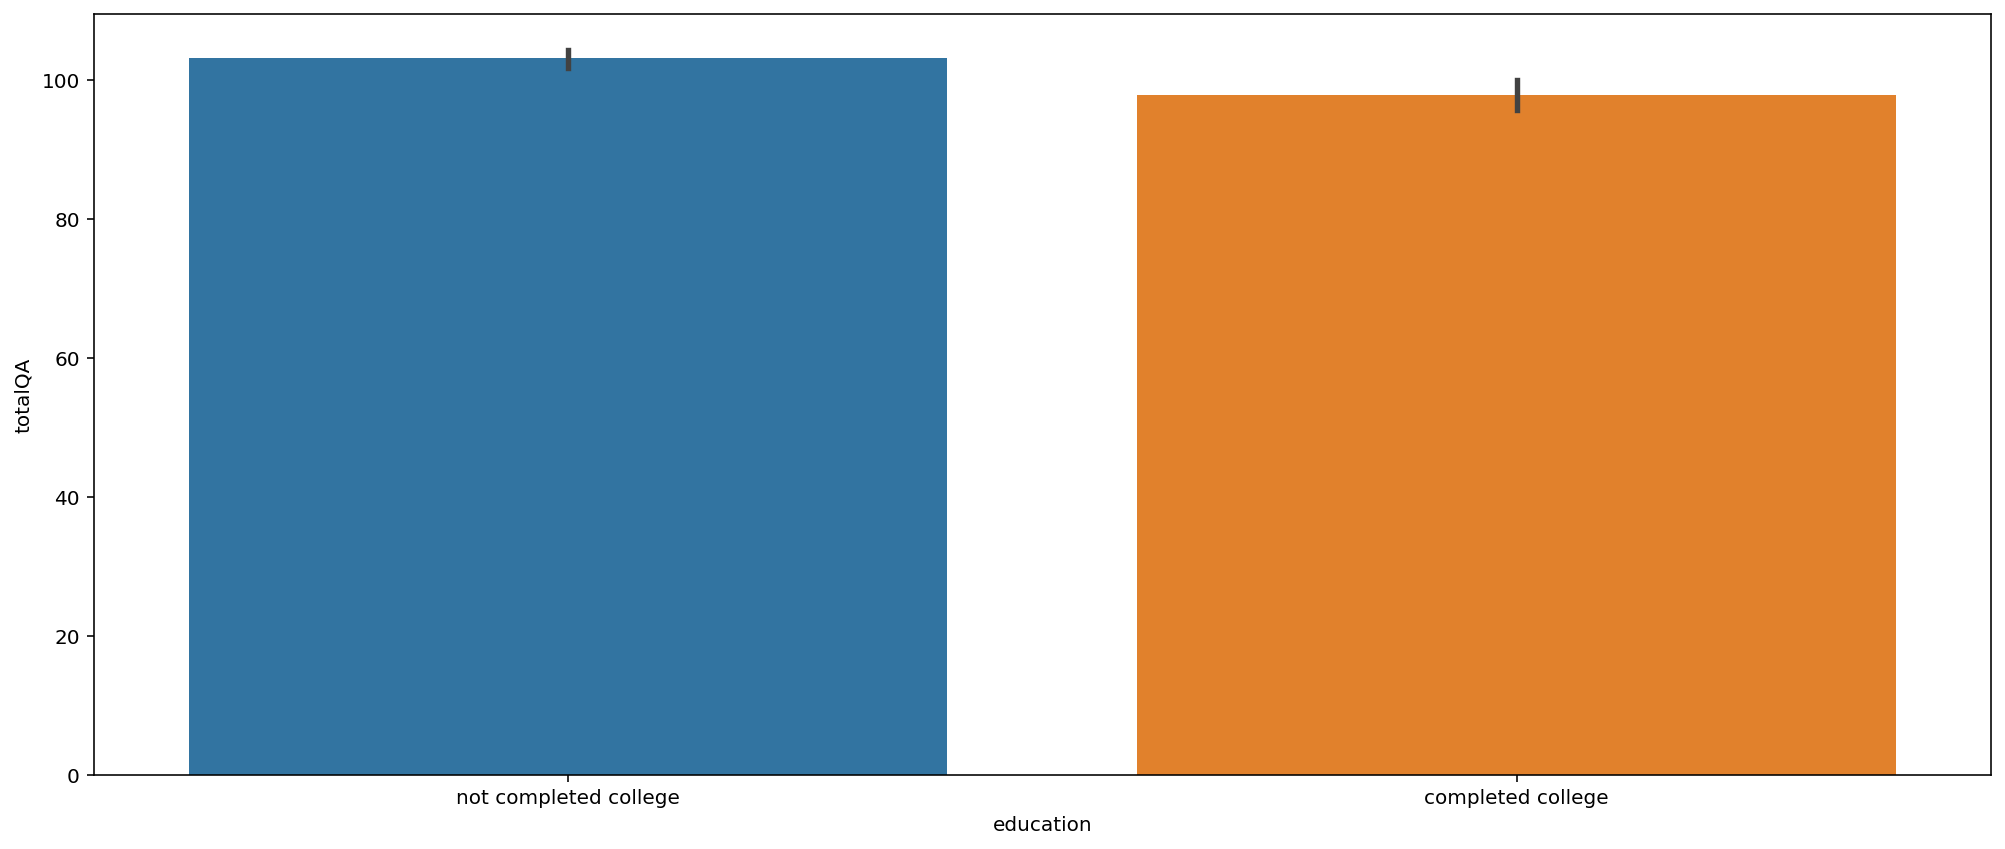

In [11]:
# create barplot to compare the total questions answered by people who did not complete college vs people who completed college
sns.barplot(x="education", y="totalQA", data=df)

At the first glance of our data, we are comparing the averages participant's DASS scores, controlling for whether or not they went to college. Contrary to our hypothesis, participant's who did not attend college experience slightly higher levels of depression, stress, and anxiety.

Text(0.5, 0, 'stress')

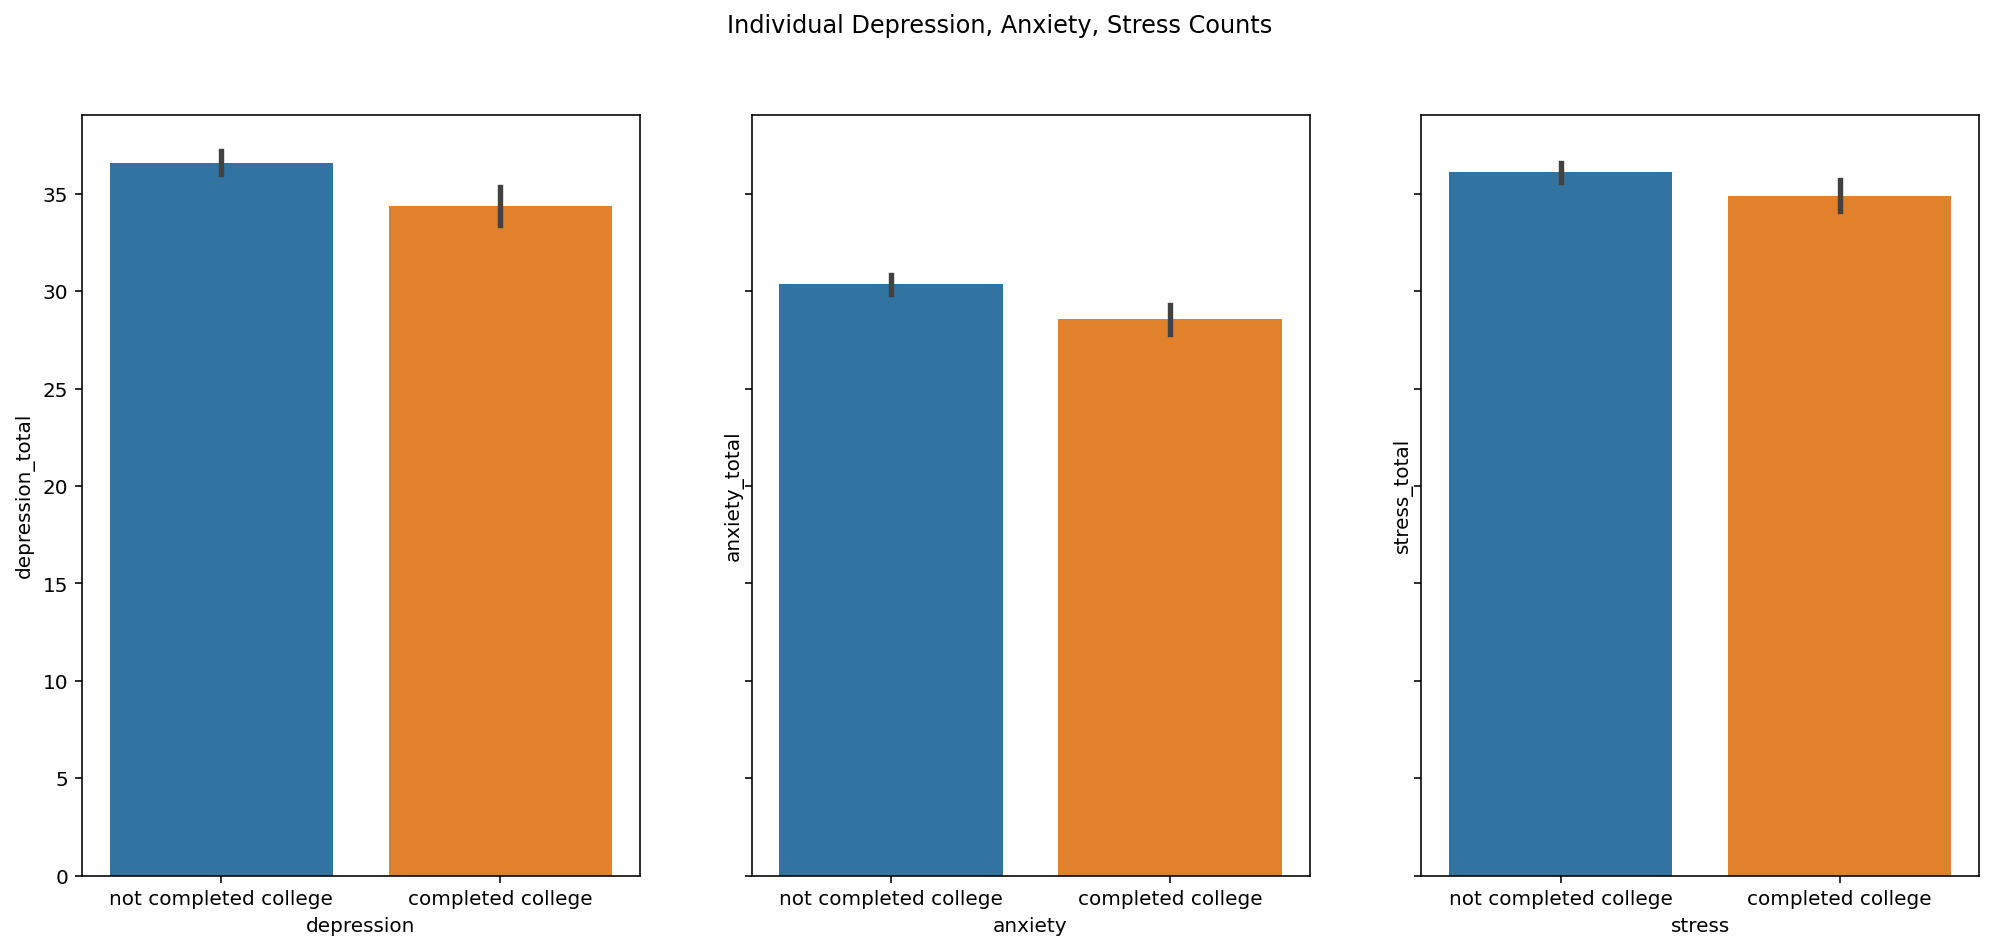

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols =3, sharey = True)
fig.suptitle('Individual Depression, Anxiety, Stress Counts')
sns.barplot(data = df, y = 'depression_total', ax = ax1, x = 'education')
ax1.set_xlabel('depression')
sns.barplot(data = df, y = 'anxiety_total', ax = ax2, x = 'education')
ax2.set_xlabel('anxiety')
sns.barplot(data = df, y = 'stress_total', ax = ax3, x = 'education')
ax3.set_xlabel('stress')

Taking a closer look at people's levels of depression, anxiety, and stress levels, it seems consistent with their total scores, where those who did not complete college education experience higher levels of mental health problems in all categories. Noteably, participant's overall levels of anxiety is lower than that of their depression or stress.

Text(0.5, 0, 'stress')

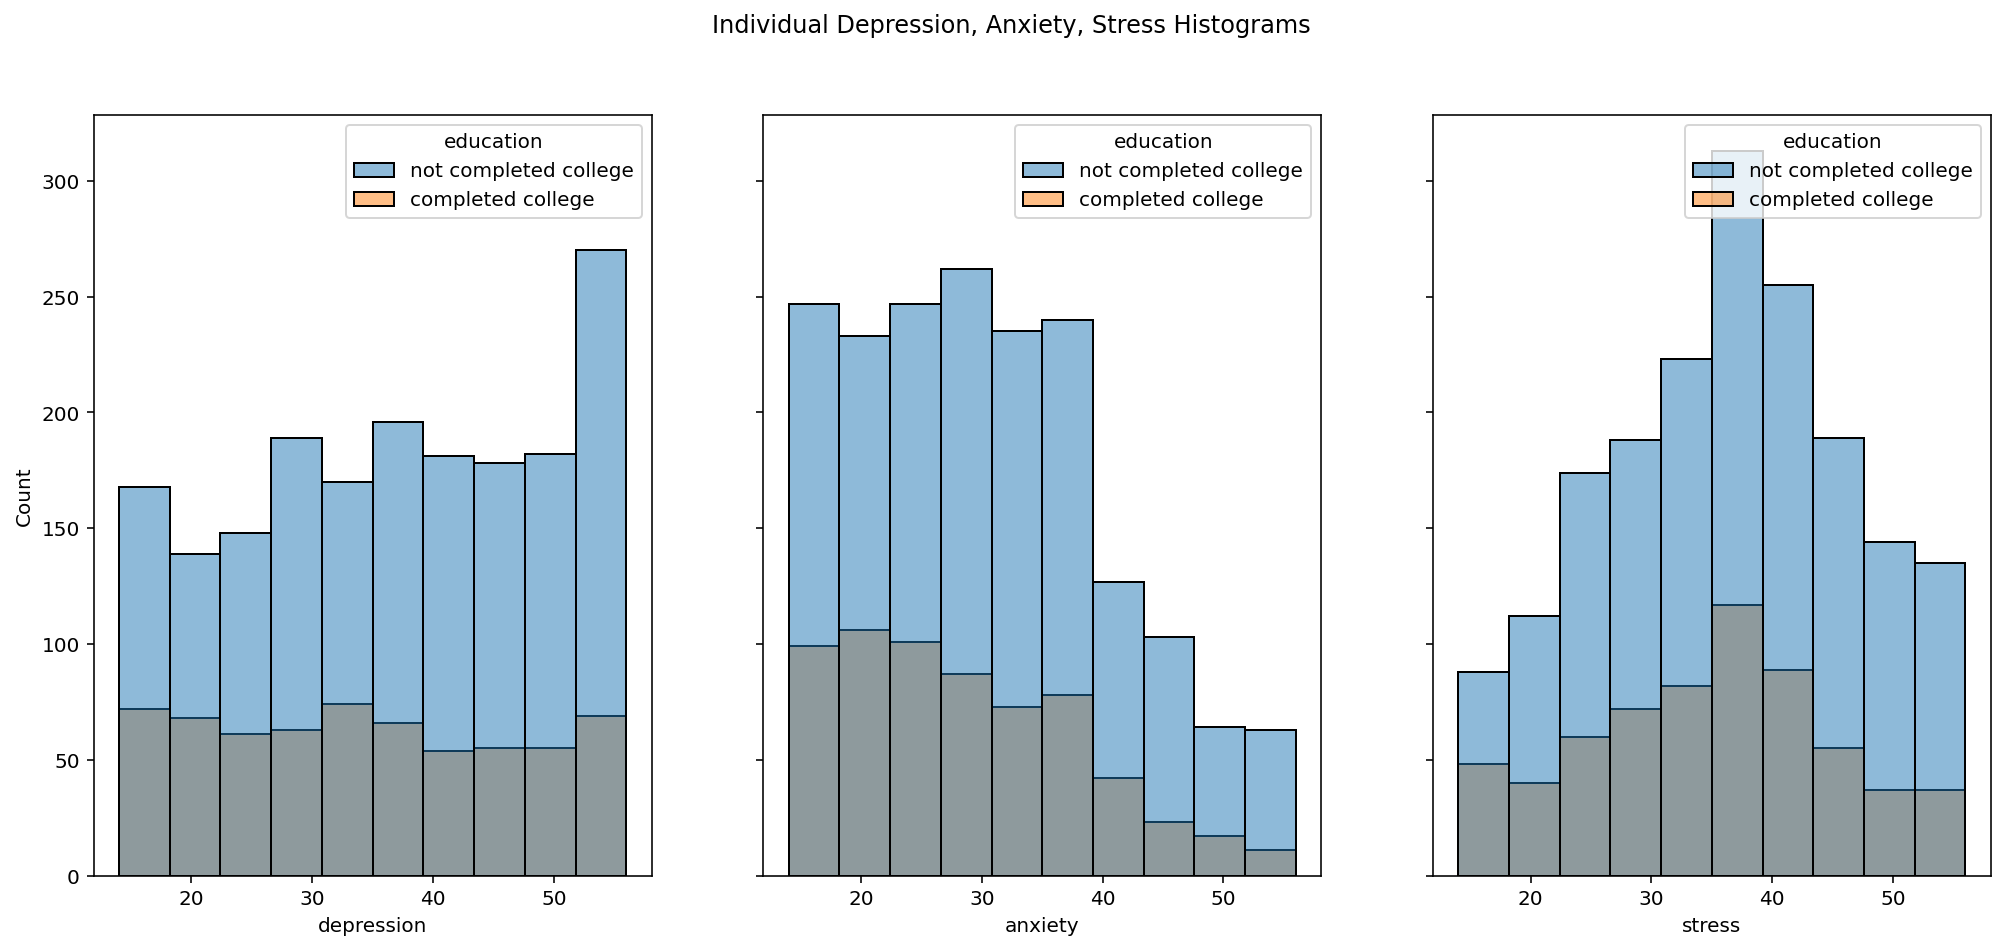

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols =3, sharey = True)
fig.suptitle('Individual Depression, Anxiety, Stress Histograms')
sns.histplot(data = df, x = 'depression_total',bins = 10, ax = ax1, hue = 'education')
ax1.set_xlabel('depression')
sns.histplot(data = df, x = 'anxiety_total',bins = 10, ax = ax2, hue = 'education')
ax2.set_xlabel('anxiety')
sns.histplot(data = df, x = 'stress_total',bins = 10, ax = ax3, hue = 'education')
ax3.set_xlabel('stress')

Now taking a look at the individual distributions of participant's depression, anxiety, and stress, we can see that their stress is normally distributed, which is the expectation due to the central limit theorem. However, people's levels of depression is almost uniformly distributed, meaning that there are similar numbers of people at all levels of depression. Finally, looking at the distribution of anxiety, it is right skewed, meaning there are a lot more people with low levels of anxiety than high anxiety.

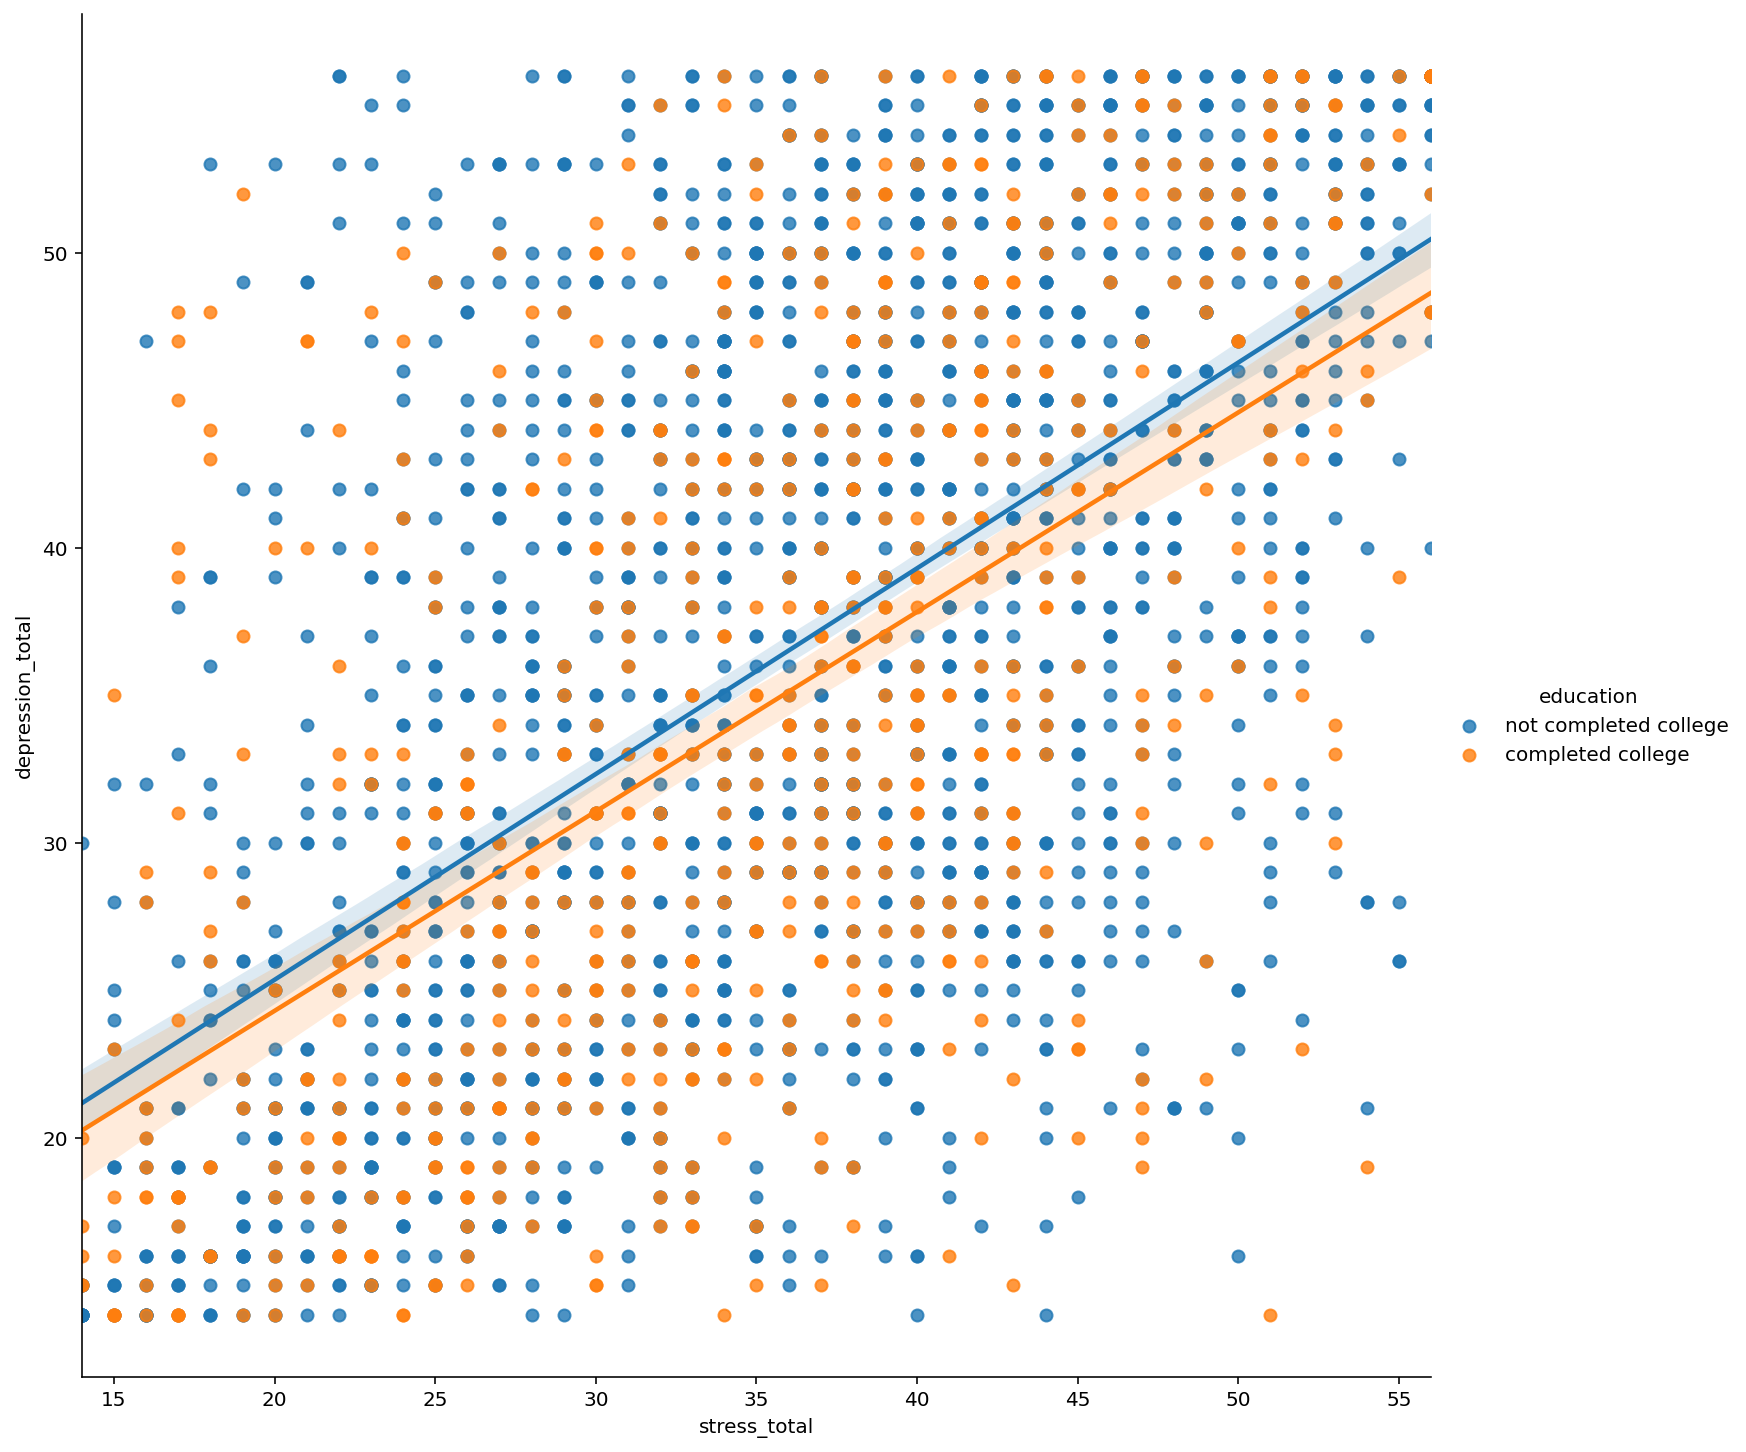

In [14]:
sns.lmplot(data = df, x = 'stress_total', y = 'depression_total', hue='education', height=10)

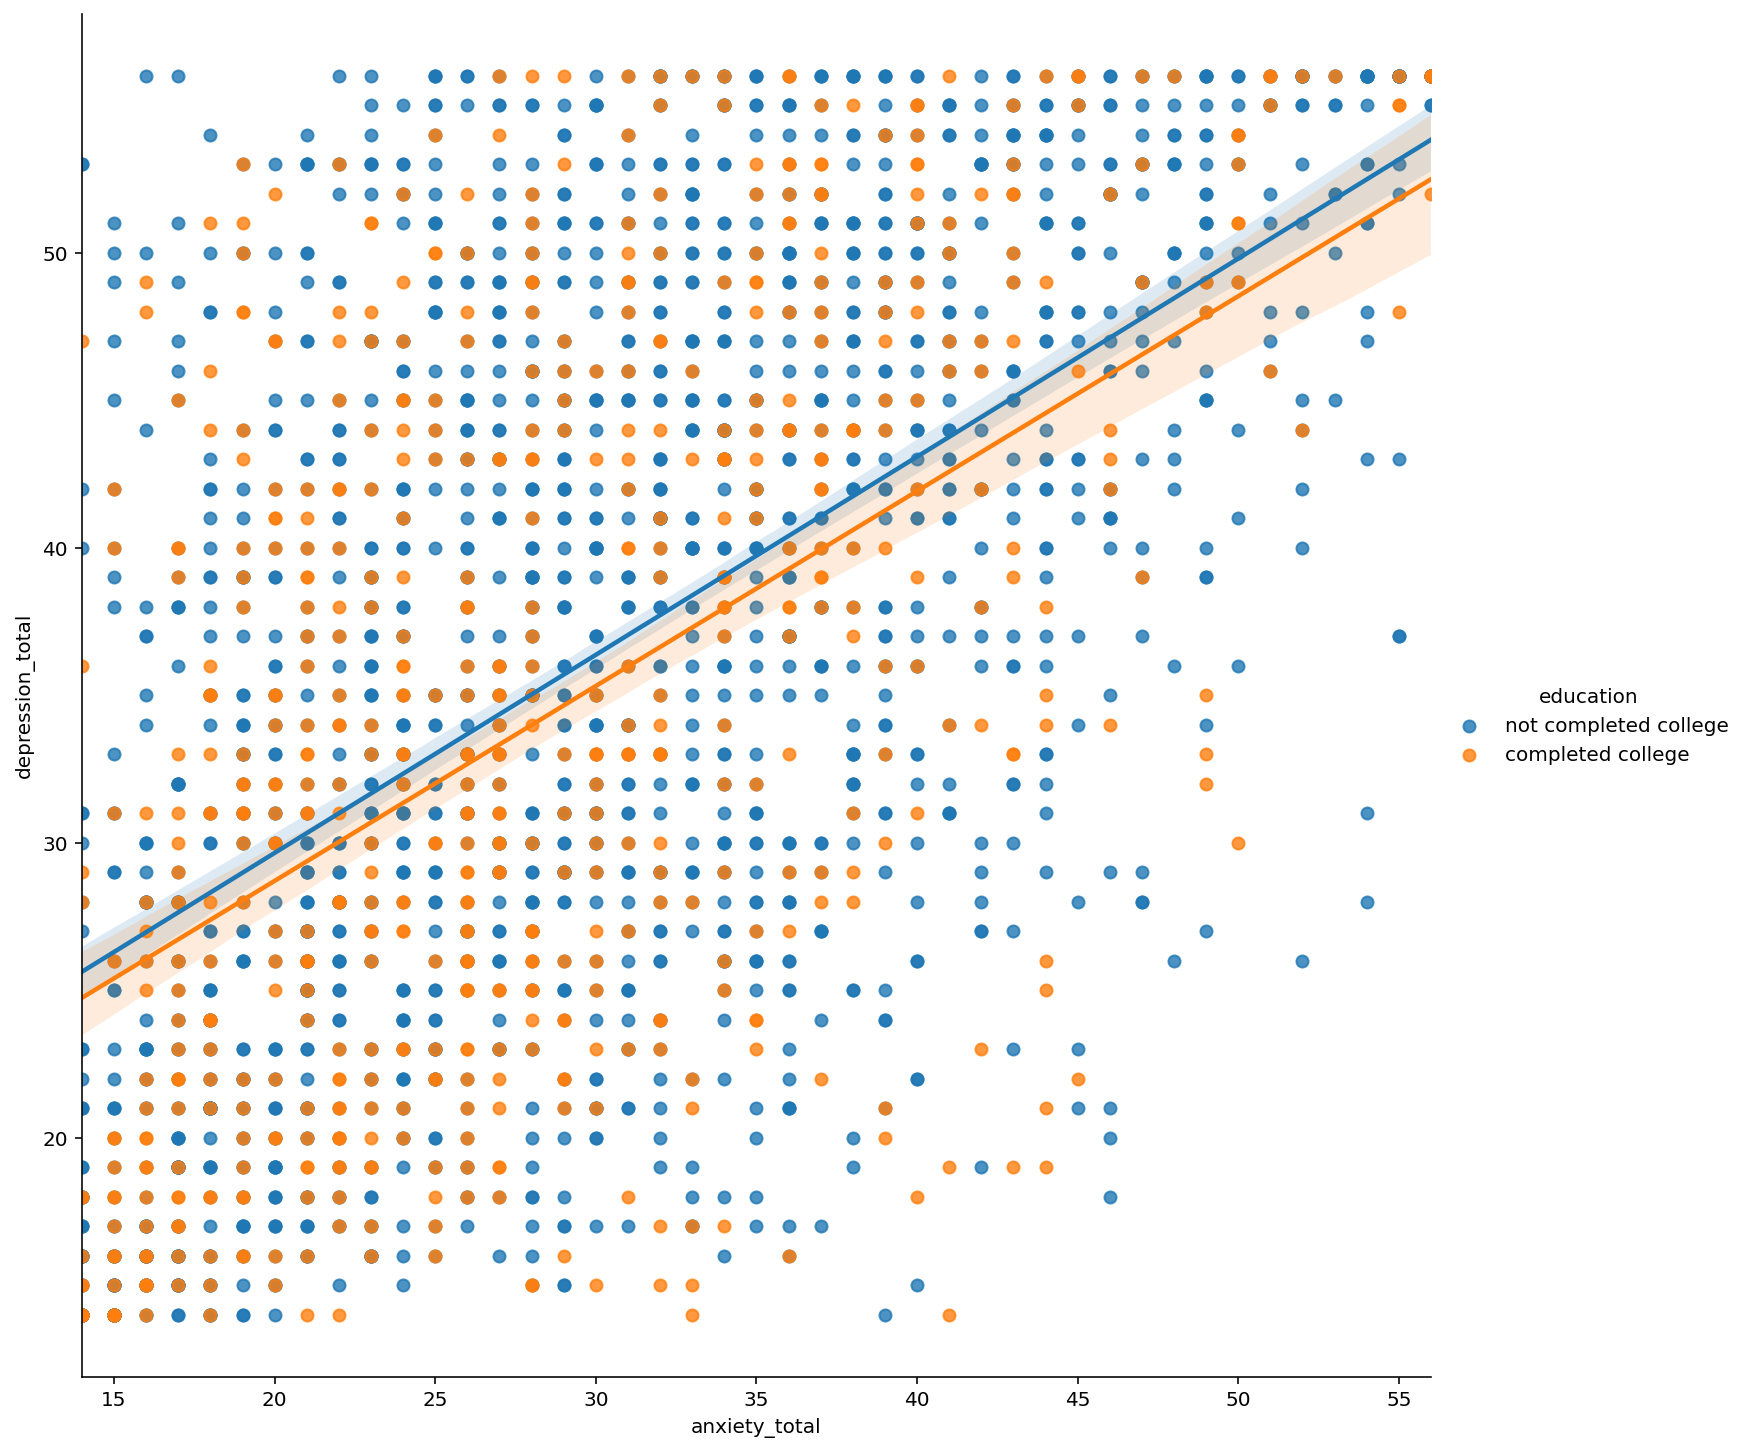

In [15]:
sns.lmplot(data = df, x = 'anxiety_total', y = 'depression_total', hue='education', height = 10)

Unsurprisingly, there is a positive and strong correlation between an individual's level of stress/anxiety and their level of depression. Reinforcing our previous interpretation of participant's DASS results, those who did not attended college have individually higher levels of each stress, depression, and anxiety. Additionally, the slopes of both lines are almost the same, meaning that, regardless of level of education, the proportion of stress/anxiety and depression you feel will likely be the same. Although the slopes between stress and anxiety are almost identical, the anxiety/depression graph has a marginally higher y-intercept than the stress/depression graph indicating that if you have anxiety, you are more likely to be depressed as well.

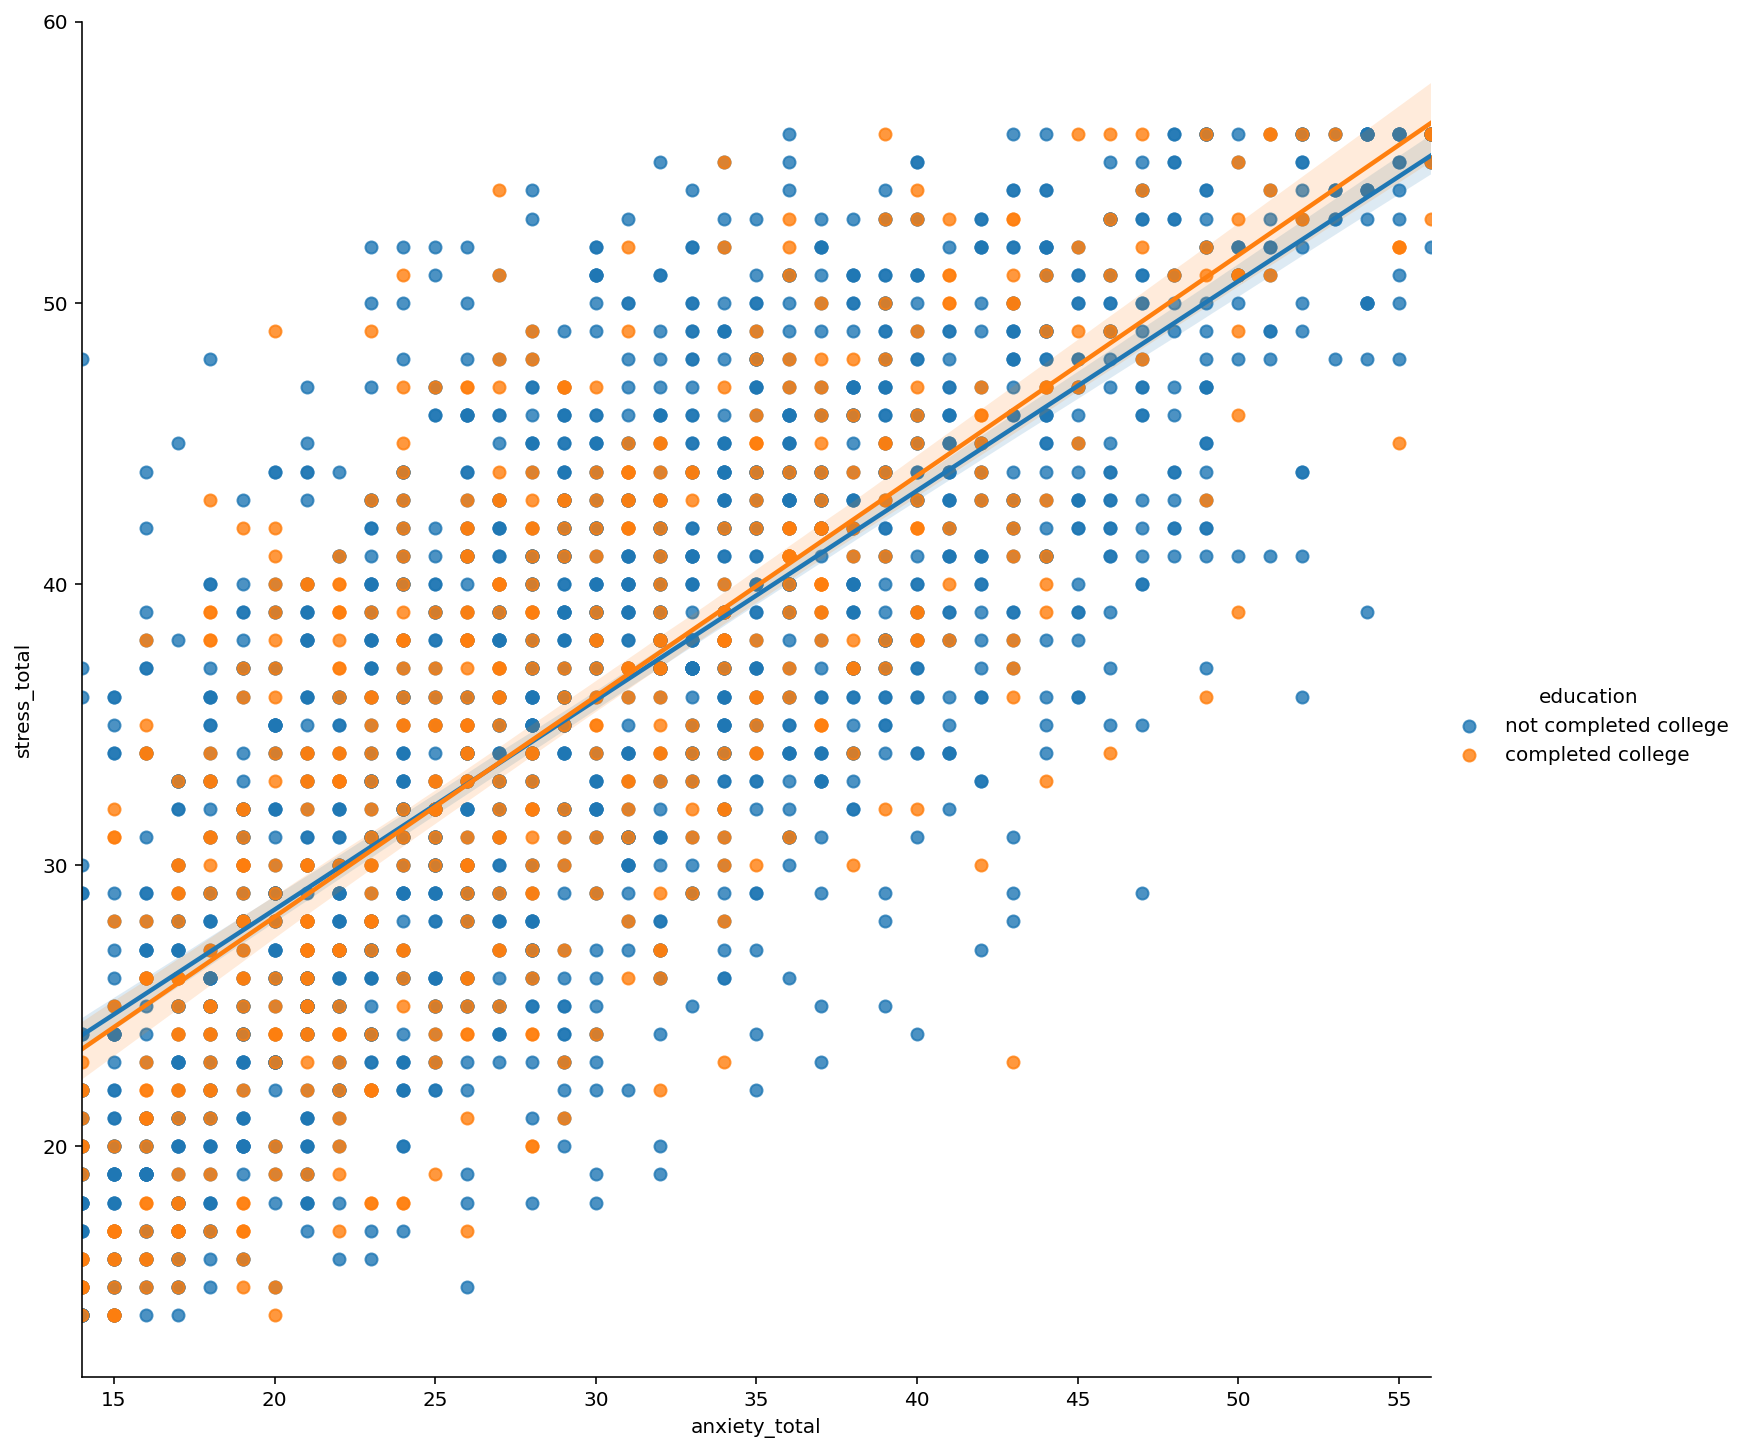

In [16]:
sns.lmplot(data = df, x = 'anxiety_total', y = 'stress_total', hue='education', height = 10)

In contrast to relating anxiety and stress to depression, when relating anxiety and stress to each other, we can see that you will experience similar levels of each of these regardless of your education levels, as the lines are almost on top of each other.

### Family Size

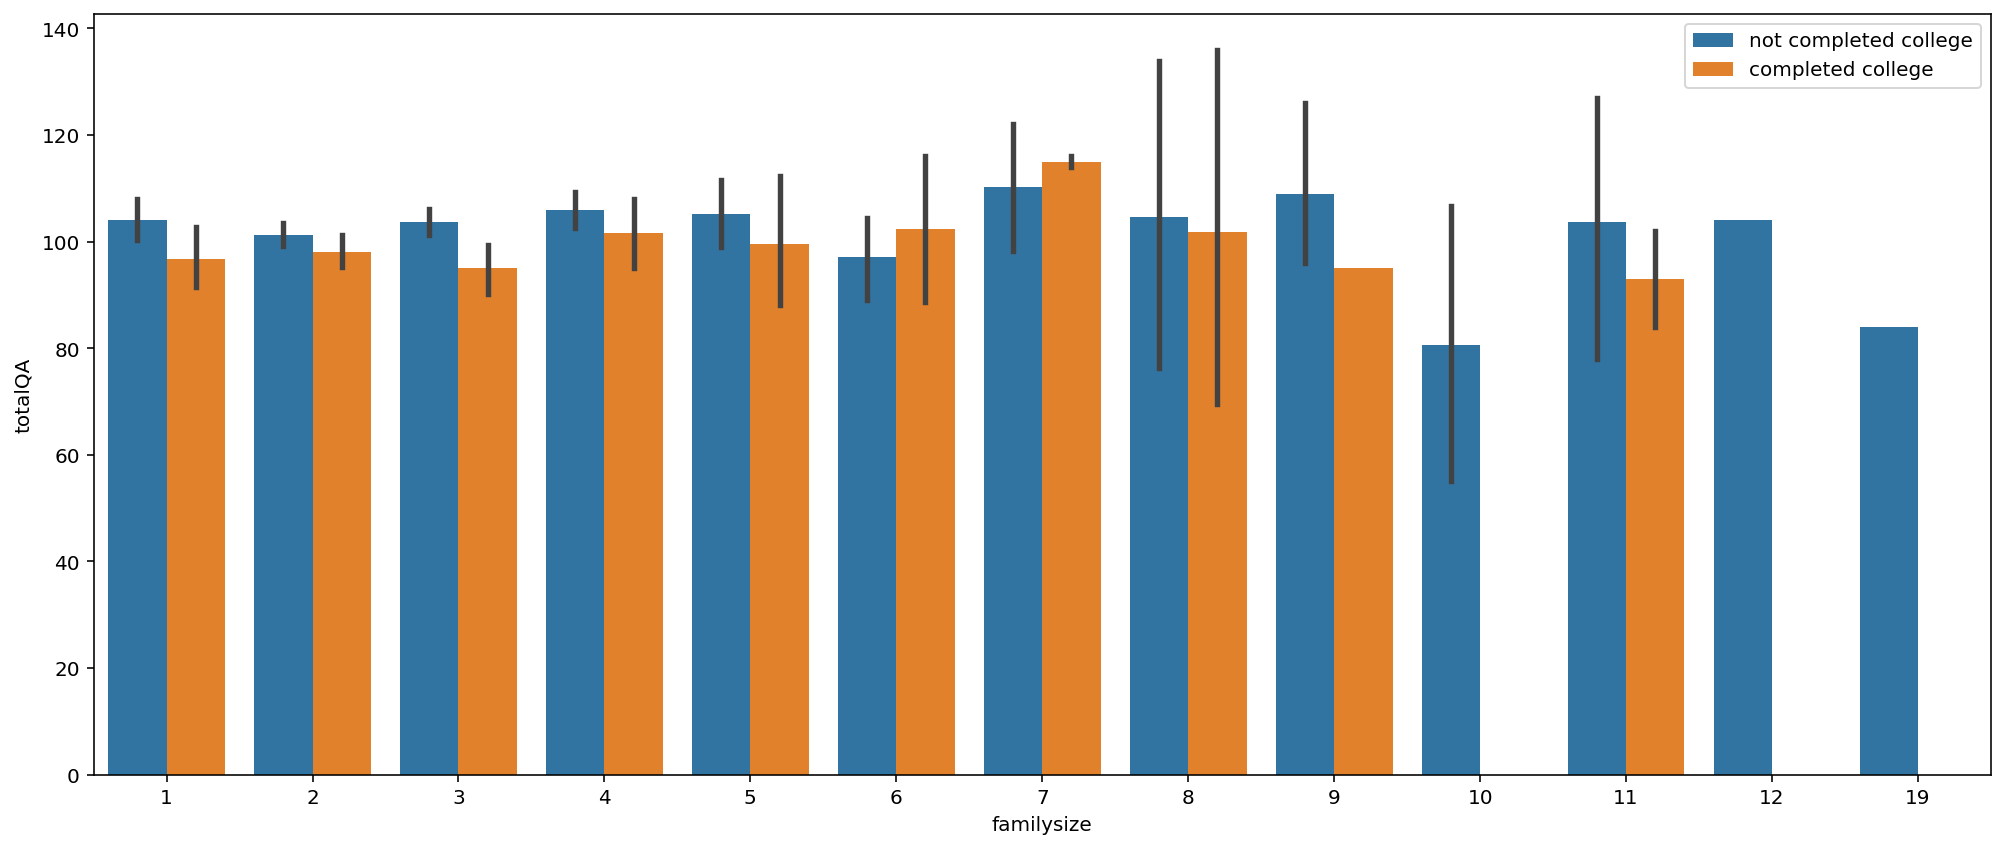

In [17]:
# create barplot to compare the different number of family sizes for people who did not complete college vs people who completed college
sns.barplot(x="familysize", y="totalQA", hue="education", data=df)

# move legend to upper right corner 
plt.legend(loc = 'upper right')


The numbers on the X axis correspond to the participant's number of siblings including the participants themselves. 

When controlling for family size, the data is mostly consistent with our original analysis as, in general, those who did not complete college experience slightly more mental health problems. Additionally, regardless of your number of family size, participant's overall level of stress seems pretty consistent.

However, the data also shows some unrealistic outliers or incorrect answers, as it is unlikely that someone would have over 10 siblings in modern America. Taking a closer look at the distribution of family members in the following graphs.

<AxesSubplot:xlabel='familysize', ylabel='count'>

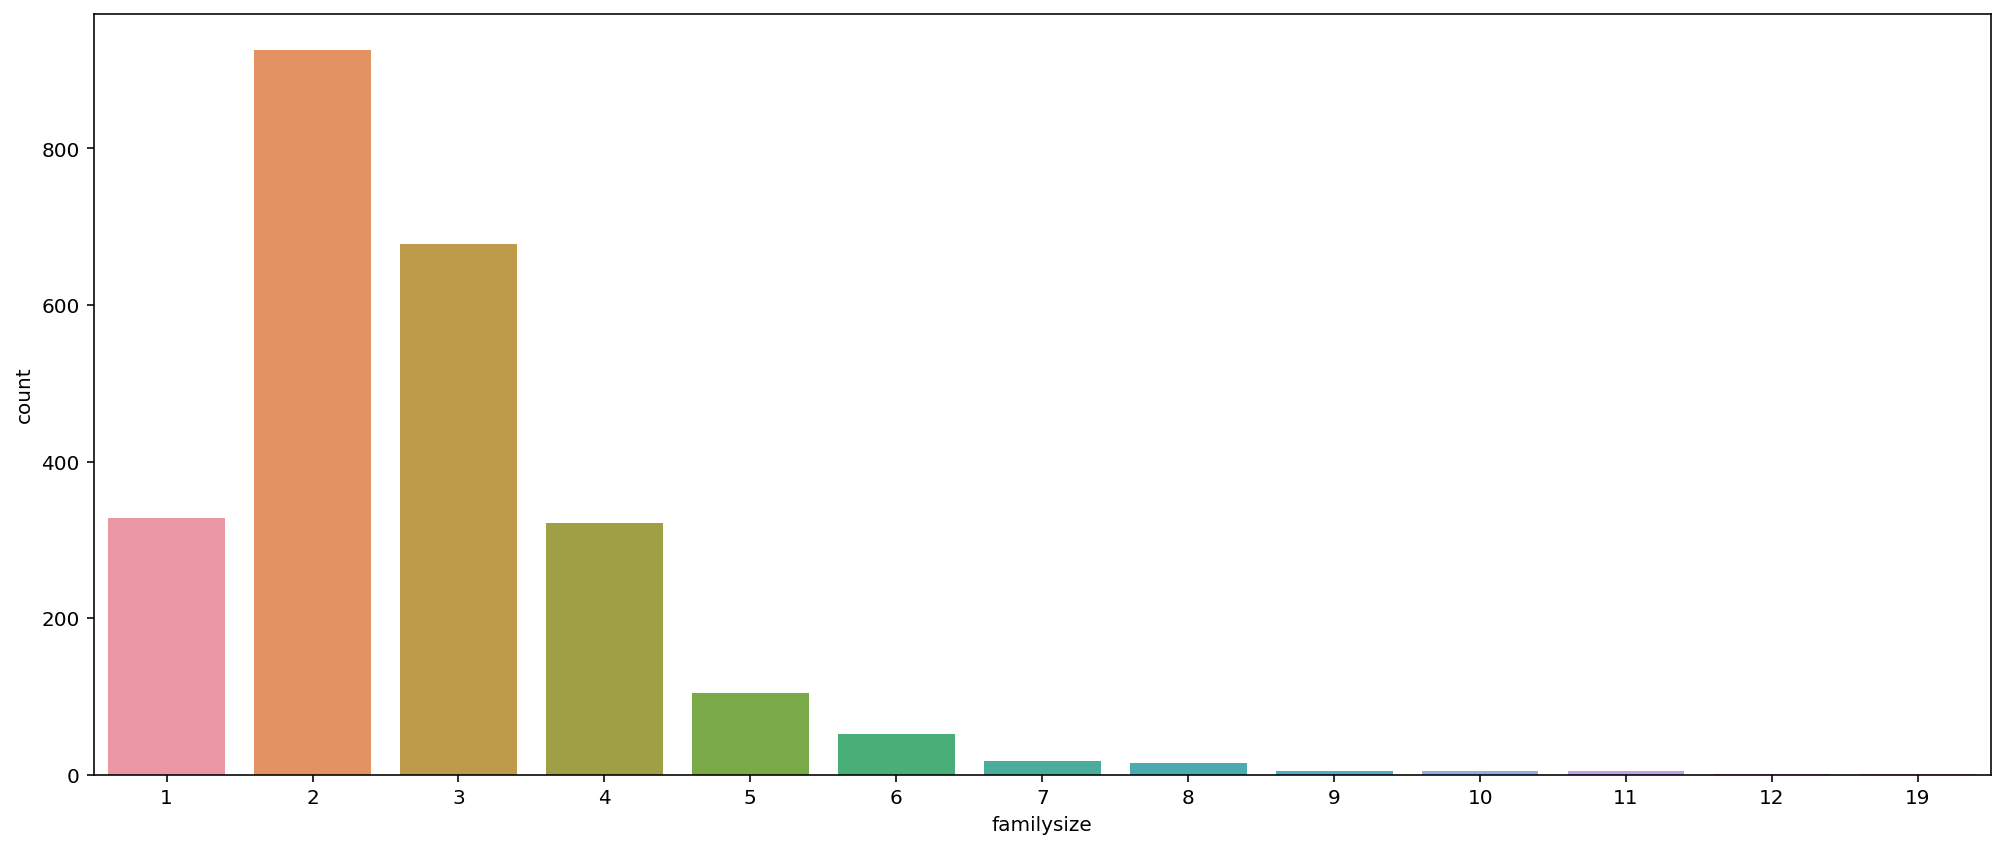

In [18]:
# create countplot to compare the count of how many people have a family count ranging from 1 family memebr to 19 family members
sns.countplot(x = df['familysize'])

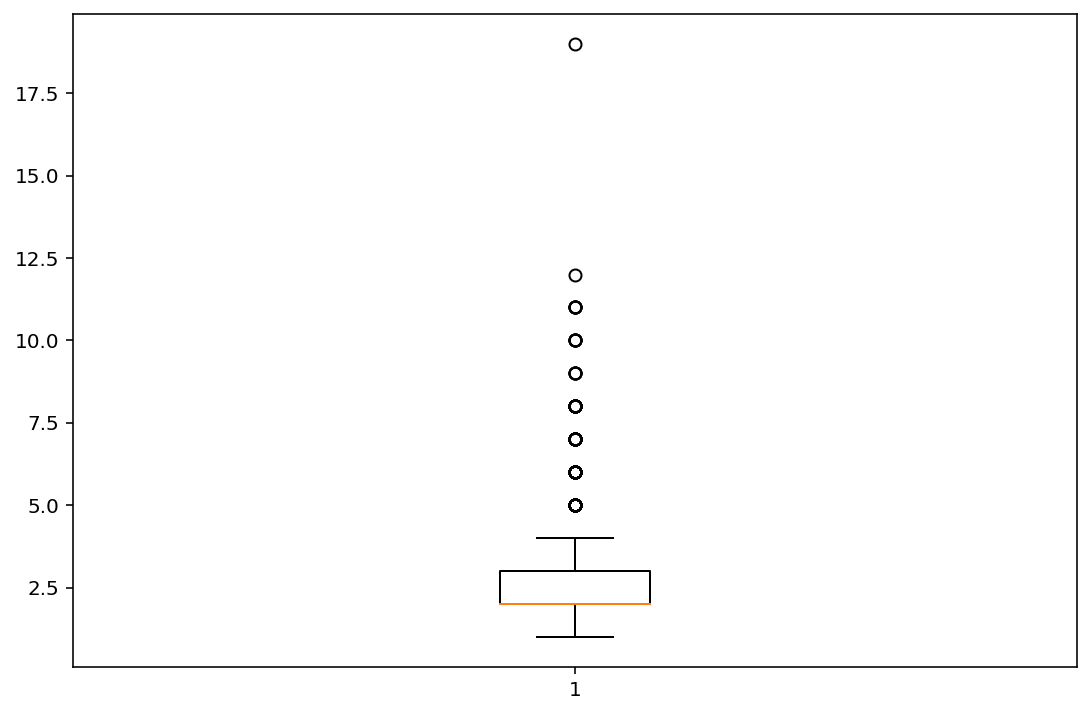

In [19]:
# set figure size
fig = plt.figure(figsize =(9, 6))
 
# creating box plot for family size, with a boxplot, the outliers will be easily recognized
plt.boxplot(df['familysize'])
 
# show box plot
plt.show()

After reviewing the number of family member's each of the participants had, it appears to be very right skewed with many unrealistic number of siblings, namely those with more than 5 siblings (using a boxplot to find the outliers of the participant's family size). In our future calculations, we plan to take out these values because they are probably incorrect or extreme outliers.

<AxesSubplot:xlabel='familysize', ylabel='count'>

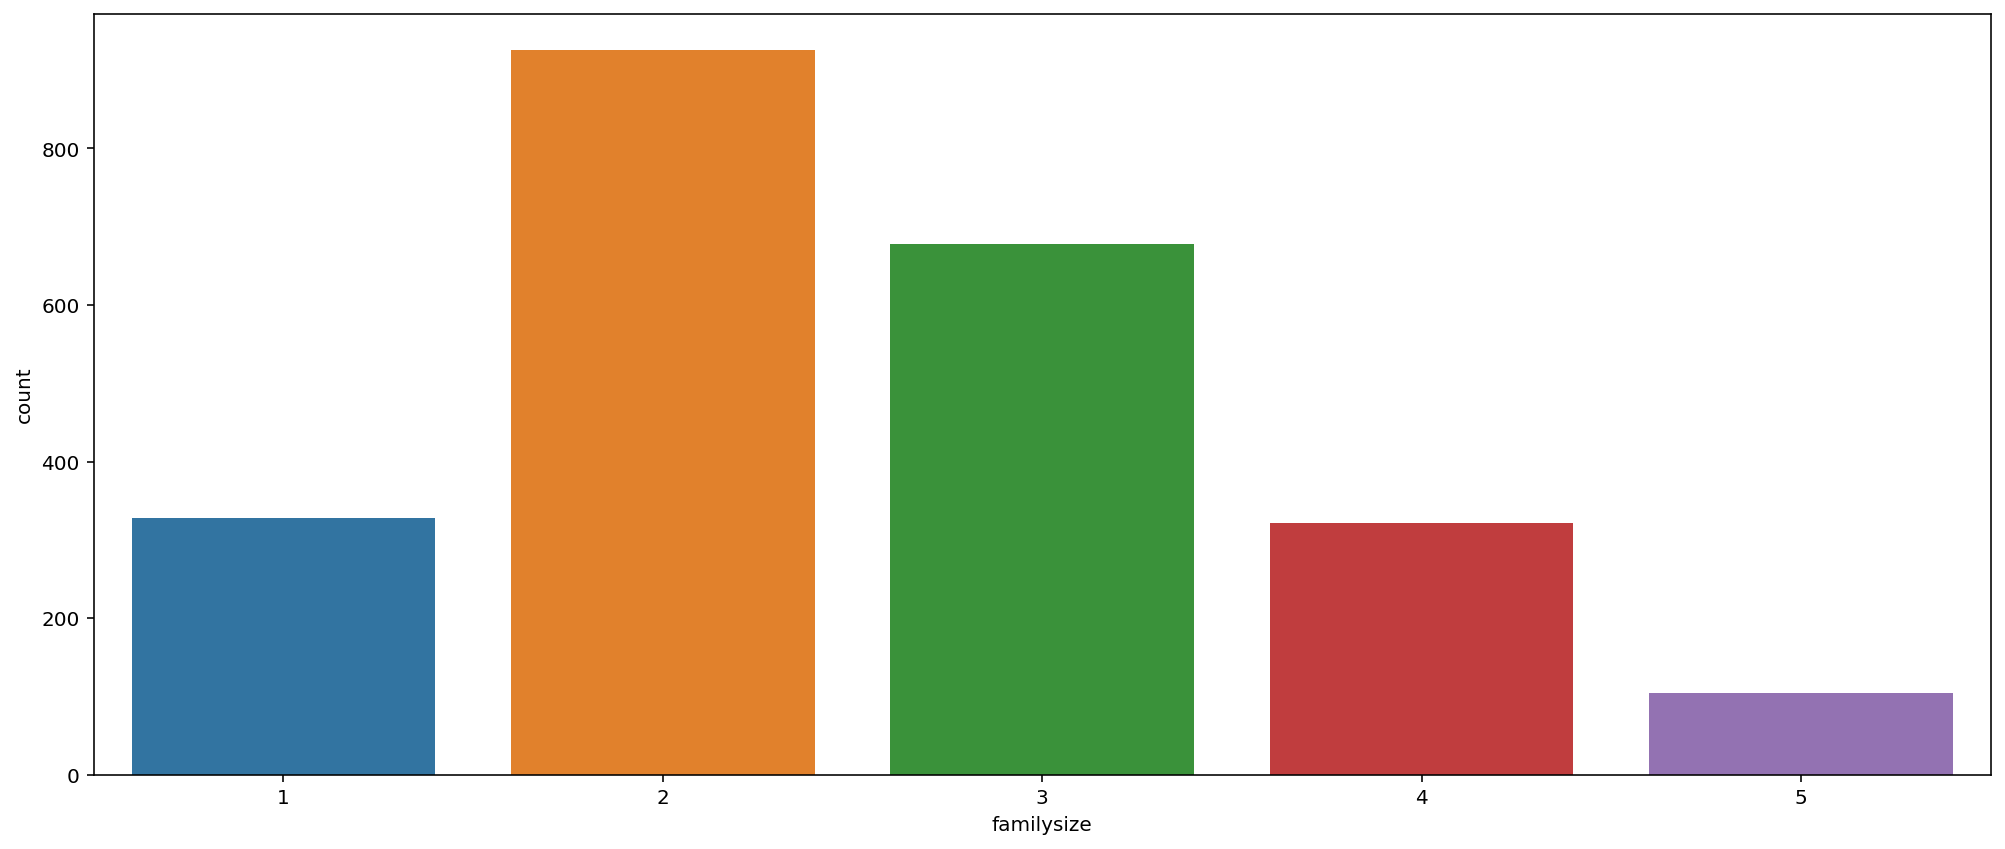

In [20]:
df = df.loc[(df['familysize'] <= 5)]

sns.countplot(x = df['familysize'])

After removing the outliers from the data, the distribution of participant's family size seems to be much more normally distributed, giving us more realistic data for our future calculations.

### Religion

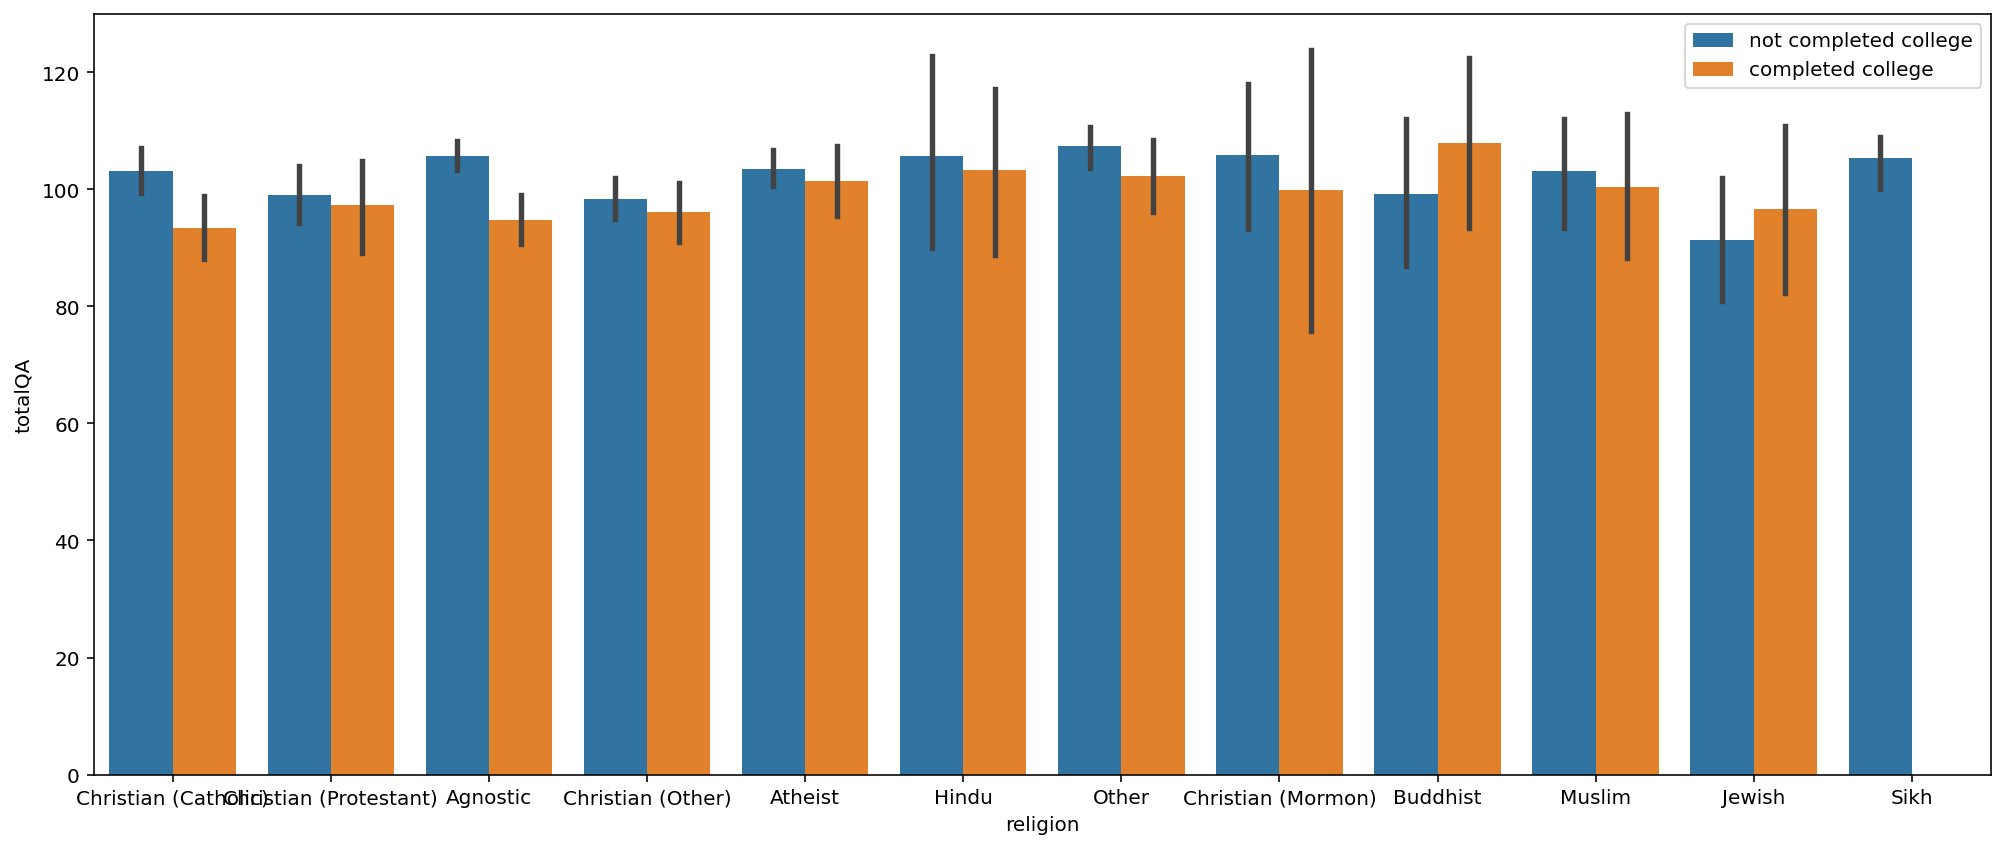

In [21]:
# create barplot to compare the different number of people who categorize themselves in a particular religion, split between people who did not complete college vs people who completed college
sns.barplot(x="religion", y="totalQA", hue="education", data=df) 

# move legend to upper right corner 
plt.legend(loc = 'upper right')

Taking a look at participants mental health controlling for their religion, it seems like once again most of the data follows the pattern of people who went to college are slightly more stressed than those who did not, regardless of their religion. Moreover, people's overall level of depression is mostly consistent throughout the different religions. This leads us to believe that religion is probably does not have an effect of participant's mental health. However, some interesting outliers are Buddhist and Jewish people, where they have a significant change that is opposite to the norm, such that those who did not go to college are significantly happer than those who did not. For future studies, it could be interesting to see it is a cultural difference or variance that is causing this change.

### Ethnicity

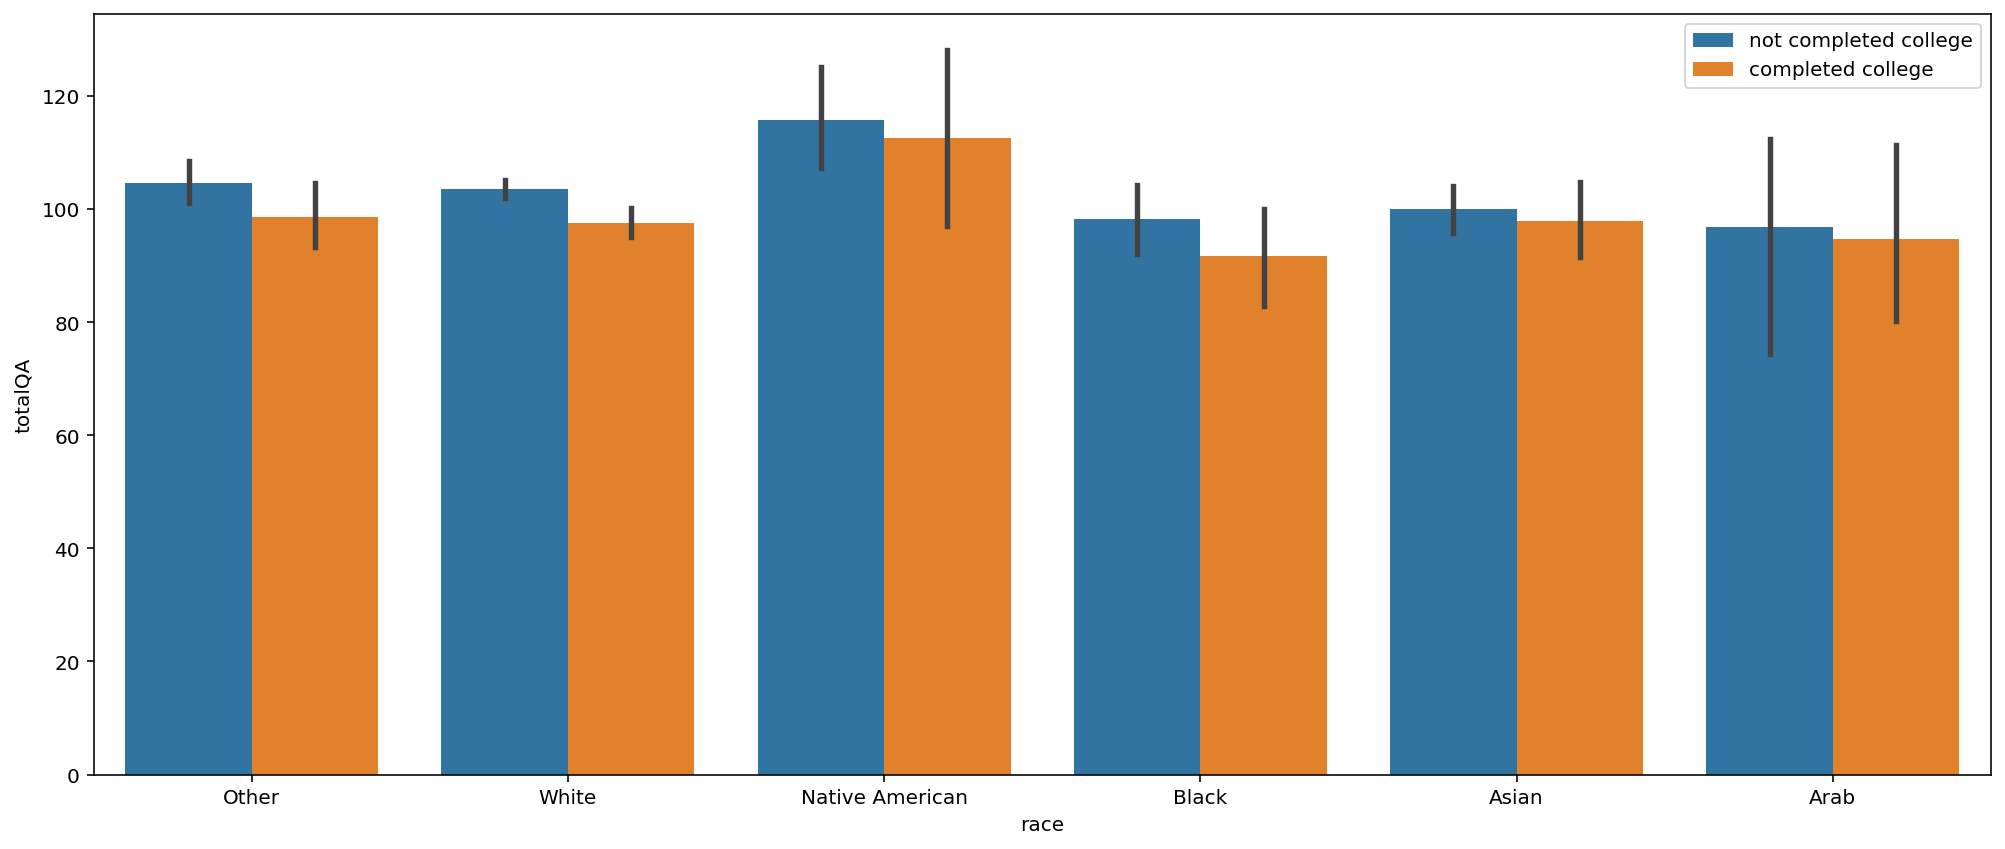

In [22]:
# create barplot to compare the different number of people who categorize themselves in a particular race, split between people who did not complete college vs people who completed college
sns.barplot(x="race", y="totalQA", hue="education", data=df)

# move legend to upper right corner 
plt.legend(loc = 'upper right')

When controlling for ethnicity, our data seems constant to our originally findings, where those who have not completed higher education have slightly more mental health problems than those who have. While there doesn't seem to be that much of a significant change in total DASS score when controllting for ethnicity. It is noticeable that for Native Americans, they have a higher overall stress level, as well as a slightly higher stress level for those who have a completed a higher education, which is inverted from the rest of the ethnicities.

### Data Results

In [23]:
# print OLS Regression Results to check for correlation between our data                    
outcome_1, predictors_1 = patsy.dmatrices('totalQA~education', df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                totalQA   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     17.84
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           2.49e-05
Time:                        00:24:21   Log-Likelihood:                -11220.
No. Observations:                2357   AIC:                         2.244e+04
Df Residuals:                    2355   BIC:                         2.246e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Based on the OLS Regression Results relating an individual's completion of college and mental health state, we can see that there is probably not a correlation between a person's relation between a person's overall stress, anxiety, and depression and their completion of university, as the R-squared value is 0.008, meaning that only .8% of the variance can be attributed to education level. This shows that there is not a relationship between education level and stress, anxiety, and depression

In [24]:
#
outcome_1, predictors_1 = patsy.dmatrices('totalQA~education + familysize', df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                totalQA   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.24
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           3.73e-05
Time:                        00:24:21   Log-Likelihood:                -11219.
No. Observations:                2357   AIC:                         2.244e+04
Df Residuals:                    2354   BIC:                         2.246e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [25]:
#
outcome_1, predictors_1 = patsy.dmatrices('totalQA~education + race', df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                totalQA   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.407
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.46e-05
Time:                        00:24:22   Log-Likelihood:                -11213.
No. Observations:                2357   AIC:                         2.244e+04
Df Residuals:                    2350   BIC:                         2.248e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [26]:
outcome_1, predictors_1 = patsy.dmatrices('totalQA~education + religion', df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                totalQA   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.477
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           4.12e-05
Time:                        00:24:23   Log-Likelihood:                -11209.
No. Observations:                2357   AIC:                         2.244e+04
Df Residuals:                    2344   BIC:                         2.252e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Based on the OLS Regression Results relating an individual's completion of college and mental health state, when controlling for family size, race, and religion, their R-Squared values are 0.009, 0.009, and 0.008 respectively. We can see that there is still not a strong correlation between a persons level of depression, stress, and anxiety given by the DASS, so we fail to reject the null hypothesis.

# Ethics & Privacy

The dataset used for this project is publicly available and was retrieved from the open-source website Kaggle. The data was collected from an online version of the DASS test, as seen on http://www2.psy.unsw.edu.au/dass/. The dataset does not provide any sensitive information about the participants and contains data only from participants that consented to having their answers be used for research purposes. All participants remained anonymous. In addition, validity checks were present to remove any participants that did not answer truthfully. Validity checks included confirming whether a word was real or not.

The dataset has collected answers from both people with a college education and people without and no particular population was excluded. There may be a selection bias due to the increased likelihood of people with mental health issues taking a survey about mental health that will give personalized results. This results in a skew toward people who may scoring higher on the DASS scale no matter the educational background. Outside of this, we believe that other potential bias should be minimal. 

# Conclusion & Discussion

Our research sought out to figure out whether or not completing a higher level of education was a cause of mental health issues in young adults. We analyzed an individual's mental health state using the Depression, Anxiety, and Stress Scale (DASS), which asks participants a series of questions, and gives a numerical score to their mental health state. We hypothesized that people who have completed college would have more mental health problems because of academic stress, student loans, and difficulty transitioning to the workplace. During our analysis, we found that this was the opposite case where those who did not complete an education were measured slightly higher on the DAS Scale. We then controlled for 3 different factors: family size, ethnicity, and religion. However, even when controlling for these variables, the distribution of participant's DASS rating was unphased. Finally, we did an OLS regression to see if DASS score could be caused by a participant's level of education. However, we got an R-Squared value of 0.008, meaning that there was barely any correlation between college education and DASS score. Moreover, when trying to predict DASS score from education in conjunction with family size, race, or religion, we obtained similar results. We then failed to reject our null hypothesis, as we found no correlation or causation between level of education and mental health state.

Some limitations in our data were the specificity and nature of people with mental health problems. Because our data set only took into account people's highest obtained degree, those who were currently in pursuit of a higher education were listed as not completed high school. This could potentially be a confounding variable in our analysis because we do not know exactly how enrollment in university or college can affect an individual's mental health. Another limitation of our data stems from people who have mental health issues such as depression or anxiety are less likely to respond to questionnaires. The final limitation of our analysis was we did not take into account people's socio-economic status or their employment status. These two things probably play major roles in individuals mental health, but our dataset did not have information about these variables.

Moving forwards, although we did not find a causation between people's level of education and their mental health state, our research did find some interesting distributions and outliers that can be the basis of future research projects. For example, in contrast to stress and anxiety and in spite of the large sample size, people's level of depression was uniformly distributed. It could be very interesting to take a look as to why people's level of depression failed to conform to the central limit theorem. Another outlier we found was that Native Americans faced marginally higher levels of mental health problems than any other ethnicities in our study, and reasons to why or how to help them could also be the foundation of other research projects. While our project did not find a causation, we did help narrow down the causes of mental health issues. Depression, stress, and anxiety are an ever growing plague and finding and solving the root of these problems should be a top priority of data scientists everywhere.


# Team Contributions

Daniel Au - Background & Prior Work, Ethics and Privacy, Checkpoint Issues, Overview, Final Video

Jacob Au - Data Cleaning/Wrangling, Data Visualization and Analysis, Background, Conclusion

Mira Chokshi - Background, Ethics and Privacy, Final Video

Sahil Dadhwal - Background, Data cleaning/Annotations/Data visualizations, Ethics and Privacy, Final Video

Ryan Xu - Data Cleaning, Annotations, Final Video, Final Video Editing